# First Recommender Attempt

In [12]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

%matplotlib inline

In [6]:
pd.set_option('display.max_columns', None)

In [3]:
ratings = pd.read_csv('./data/veggie_ratings.csv')
ratings.head()

,Timestamp,Artichokes,Arugula,Asparagus,Bush beans (green beans),Pole beans(green beans),Beets,Bok Choy,Broccoli,Brussel Sprouts,...,Radishes,Rhubarb,Rutabaga,Shallots,Spinach,Summer Squash,Winter Squash,Swiss Chard,Tomatoes,Turnips
0,10/12/2021 17:47:21,5,5,5,4,4,1,3,5,5,...,1,2,2,4,5,1,1,3,5,2
1,10/12/2021 17:57:50,2,4,2,4,2,1,1,3,1,...,1,1,1,3,5,1,1,1,4,1
2,10/12/2021 18:17:26,3,3,5,3,3,1,1,4,3,...,1,2,1,5,5,1,1,1,4,1
3,10/12/2021 18:18:15,4,2,1,2,2,2,3,3,3,...,3,2,2,2,2,2,2,2,1,2
4,10/12/2021 18:21:26,3,2,5,5,5,1,1,5,1,...,1,1,1,1,1,1,1,1,5,1


In [7]:
ratings.describe()

,Artichokes,Arugula,Asparagus,Bush beans (green beans),Pole beans(green beans),Beets,Bok Choy,Broccoli,Brussel Sprouts,Cabbage,Carrots,Cauliflower,Celery,Chives,Collards,Corn,Cucumbers,Eggplant,Garlic,Kale,Leeks,Lettuce,Mustard Greens,Onions,Parsnips,Peas,Peppers,Potatoes,Pumpkin,Radishes,Rhubarb,Rutabaga,Shallots,Spinach,Summer Squash,Winter Squash,Swiss Chard,Tomatoes,Turnips
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.088235,3.323529,4.000000,3.882353,3.784314,2.411765,2.774510,4.235294,3.598039,3.421569,4.176471,3.686275,3.098039,3.774510,2.735294,4.176471,3.754902,2.950980,4.725490,3.186275,2.911765,4.186275,2.411765,4.382353,2.490196,3.362745,4.500000,4.735294,3.480392,2.666667,2.274510,1.892157,3.676471,4.186275,3.568627,3.333333,2.323529,4.186275,2.264706
std,1.320838,1.244089,1.218667,1.128340,1.215636,1.491580,1.378095,1.082502,1.523803,1.230280,1.018753,1.356907,1.375239,1.257901,1.378236,1.120571,1.381893,1.423825,0.615909,1.295311,1.400869,1.012109,1.213398,0.995476,1.272287,1.474464,0.920073,0.658929,1.325533,1.307506,1.203599,0.994110,1.408333,1.087557,1.424745,1.444233,1.283264,1.183470,1.281448
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,2.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,4.000000,5.000000,2.000000,2.000000,1.000000,1.000000,3.000000,4.000000,3.000000,2.000000,1.000000,4.000000,1.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,3.000000,5.000000,3.000000,3.000000,4.000000,2.000000,5.000000,2.000000,4.000000,5.000000,5.000000,3.500000,3.000000,2.000000,2.000000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<ipython-input-36-6dd60d54845e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ratings.mean().sort_values().plot(kind='barh', figsize=(10, 10))


Text(0.5, 1.0, 'Average Vegetable Ratings')

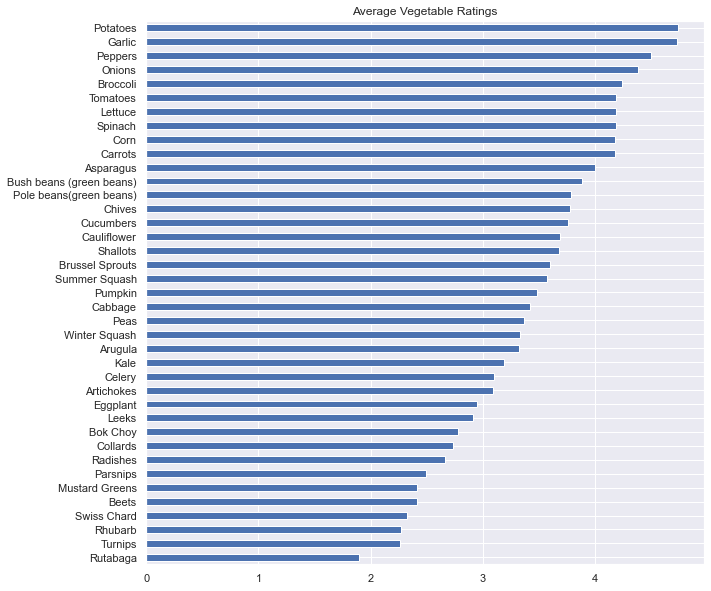

In [36]:
ratings.mean().sort_values().plot(kind='barh', figsize=(10, 10))
plt.title('Average Vegetable Ratings')